# SIR Model

Importing libraries: [numpy](https://numpy.org/), [scipy](https://www.scipy.org/), [matplotlib](https://matplotlib.org/)

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Defining the model's equations:

$$\dot{S(t)} = - \frac{\beta * I(t)}{N} * S(t)$$
$$\dot{I(t)} = \frac{\beta * I(t)}{N} * S(t) - \gamma * I(t)$$
$$\dot{R(t)} = \gamma * I(t)$$

In [3]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [4]:
(N, time) = (1000, 1 * 365)
(I0, R0) = (1, 0)
(latentPeriod, infectiousPeriod) = (8, 7)
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
(beta, gamma) = (0.2, 1./10)
# A grid of time points (in days)
S0 = N - I0 - R0



In [ ]:
t = np.linspace(0, 160, 160)
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

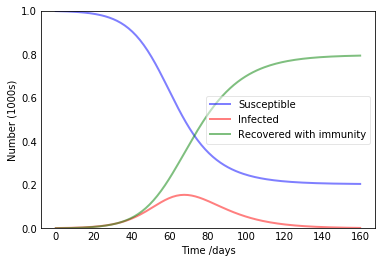

In [5]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, 1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()